In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
#importing the dataset
dataset = pd.read_csv("creditcard.csv")
dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
#we are using robust scalar though it is less affected by the outliers 

from sklearn.preprocessing import RobustScaler

R_scalar = RobustScaler()
dataset['amount'] = R_scalar.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['time'] = R_scalar.fit_transform(dataset['Time'].values.reshape(-1,1))

In [10]:
#lets drop the unscaled data
dataset.drop(['Time','Amount'],axis=1,inplace = True)
amount = dataset['amount']
time = dataset['time']

dataset.drop(['amount','time'], axis=1, inplace=True)
dataset.insert(0, 'scaled_amount', amount)
dataset.insert(1, 'scaled_time', time)



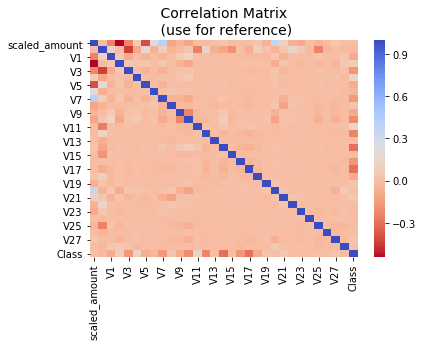

In [25]:
#finding the most relevant attributes using corrilation
correlation = dataset.corr()
correlation_map = sns.heatmap(correlation, cmap='coolwarm_r', annot_kws={'size':20})
correlation_map.set_title(' Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

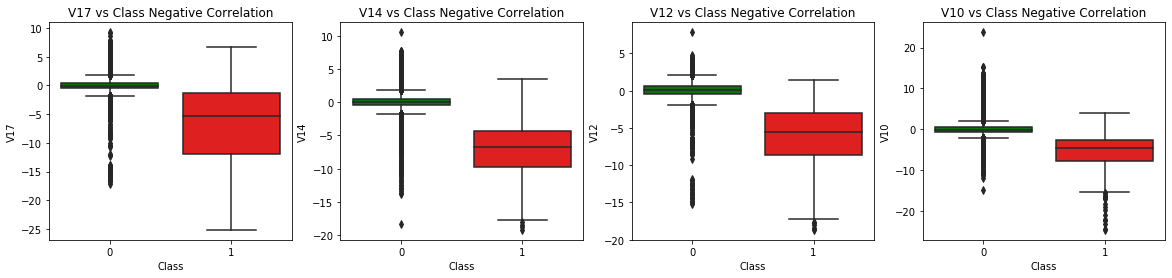

In [12]:
#Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
#attribute number 17,14,12,10 are having the lowest correlation
f, axes = plt.subplots(ncols=4, figsize=(20,4))
colors = "green","red"
sns.boxplot(x="Class", y="V17", data=dataset, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V14", data=dataset, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V12", data=dataset, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V10", data=dataset, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

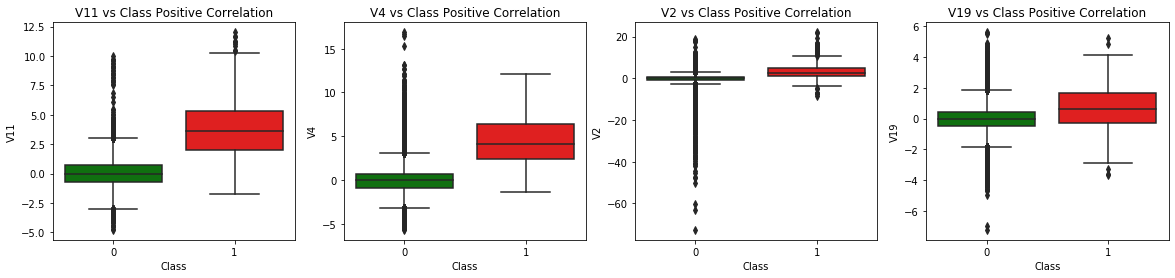

In [13]:
#Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=dataset, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=dataset, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=dataset, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=dataset, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

In [14]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = dataset['V14'].loc[dataset['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

dataset = dataset.drop(dataset[(dataset['V14'] > v14_upper) | (dataset['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = dataset['V12'].loc[dataset['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
dataset = dataset.drop(dataset[(dataset['V12'] > v12_upper) | (dataset['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(dataset)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = dataset['V10'].loc[dataset['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
dataset = dataset.drop(dataset[(dataset['V10'] > v10_upper) | (dataset['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(dataset)))

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-19.2143254902614, -18.8220867423816, -18.4937733551053, -18.049997689859396]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.047596570821604, -18.683714633344298, -18.553697009645802, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 284506
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.920334958342141
V10 outliers: [-15.1241628144946

In [15]:
from sklearn.model_selection import train_test_split
X = dataset.drop("Class", axis=1)
y = dataset['Class']
o_dx = X
o_dy = y
X_train_x, X_test_x, y_train_y, y_test_y = train_test_split(o_dx, o_dy, test_size=0.25, random_state=42)

In [16]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio='auto',kind='regular')
X_sampled,y_sampled = sm.fit_sample(X,y.values.ravel())

Using TensorFlow backend.


In [17]:
print("After OverSampling, counts of label '1': {}".format(sum(y_sampled==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_sampled==0)))

After OverSampling, counts of label '1': 282552
After OverSampling, counts of label '0': 282552


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.25, random_state=42)

In [19]:
#neural network implementation
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
oversample_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,955
Trainable params: 1,955
Non-trainable params: 0
_________________________________________________________________


In [21]:
oversample_model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])
oversample_model.fit(X_train,y_train,batch_size=32, epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
423828/423828 [==============================] - 26s 61us/step - loss: 0.0290 - acc: 0.9904
Epoch 2/20
423828/423828 [==============================] - 24s 58us/step - loss: 0.0070 - acc: 0.9983
Epoch 3/20
423828/423828 [==============================] - 22s 53us/step - loss: 0.0049 - acc: 0.9988
Epoch 4/20
423828/423828 [==============================] - 25s 60us/step - loss: 0.0040 - acc: 0.9991
Epoch 5/20
423828/423828 [==============================] - 23s 54us/step - loss: 0.0033 - acc: 0.9992
Epoch 6/20
423828/423828 [==============================] - 22s 53us/step - loss: 0.0031 - acc: 0.9993
Epoch 7/20
423828/423828 [==============================] - 22s 53us/step - loss: 0.0028 - acc: 0.9994
Epoch 8/20
423828/423828 [==============================] - 24s 56us/step - loss: 0.0025 - acc: 0.9995
Epoch 9/20
423828/423828 [==============================] - 23s 54us/step - loss: 0.0024 - acc: 0.9995
Epoch 10/20
423828/423828

In [22]:
y_pred = oversample_model.predict(X_test)
y_pred = (y_pred > 0.5)

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[70575,    62],
       [    0, 70639]], dtype=int64)

In [24]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix,recall_score,classification_report,roc_curve,precision_recall_curve

In [36]:
accuracy_score(y_test,y_pred)

0.9995611427277104

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70637
           1       1.00      1.00      1.00     70639

    accuracy                           1.00    141276
   macro avg       1.00      1.00      1.00    141276
weighted avg       1.00      1.00      1.00    141276



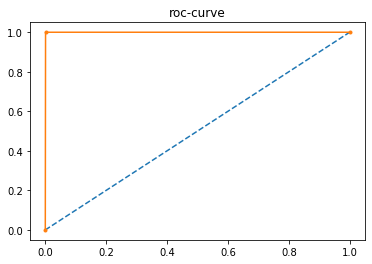

In [40]:
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
pyplot.title("roc-curve")
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

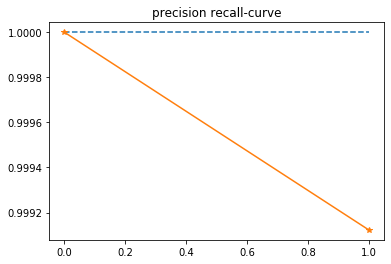

In [41]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pyplot.plot([0, 1], [1, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(recall, precision, marker='*')
pyplot.title("precision recall-curve")
# show the plot
pyplot.show()

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5
                                  , metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
Y_pred= classifier.predict(X_test)

In [42]:
accuracy_score(y_test,Y_pred)

0.9986551148107251

In [43]:
f1_score(y_test, Y_pred, average='weighted')

0.9986551123525995

In [44]:
recall_score(y_test, Y_pred,average='weighted')

0.9986551148107251

In [45]:
confusion_matrix(y_test,Y_pred)

array([[70447,   190],
       [    0, 70639]], dtype=int64)

In [46]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70637
           1       1.00      1.00      1.00     70639

    accuracy                           1.00    141276
   macro avg       1.00      1.00      1.00    141276
weighted avg       1.00      1.00      1.00    141276

